In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.0.0-rc0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
img_width = 64
img_height = 64

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
train_data_generator = datagen.flow_from_directory(directory='/content/gdrive/My Drive/cnd_data/train',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 71 images belonging to 3 classes.


In [ ]:
validation_data_generator = datagen.flow_from_directory(directory='/content/gdrive/My Drive/cnd_data/train',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 17 images belonging to 3 classes.


In [ ]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)             

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
5/5 [==============================] - 0s 90ms/step - loss: 0.8253 - accuracy: 0.4789 - val_loss: 0.9140 - val_accuracy: 0.4706
Epoch 2/5
5/5 [==============================] - 0s 80ms/step - loss: 0.7955 - accuracy: 0.4648 - val_loss: 0.6777 - val_accuracy: 0.5294
Epoch 3/5
5/5 [==============================] - 0s 78ms/step - loss: 0.7133 - accuracy: 0.5352 - val_loss: 0.6724 - val_accuracy: 0.5294
Epoch 4/5
5/5 [==============================] - 0s 85ms/step - loss: 0.6815 - accuracy: 0.5634 - val_loss: 0.6814 - val_accuracy: 0.5294
Epoch 5/5
5/5 [==============================] - 0s 80ms/step - loss: 0.6715 - accuracy: 0.6479 - val_loss: 0.6860 - val_accuracy: 0.5294


In [ ]:
history.history

{'accuracy': [0.47887325, 0.46478873, 0.53521127, 0.5633803, 0.64788735],
 'loss': [0.8462859694386872,
  0.7869236561614024,
  0.7200182684710328,
  0.6791086205294434,
  0.6727326503941711],
 'val_accuracy': [0.47058824, 0.5294118, 0.5294118, 0.5294118, 0.5294118],
 'val_loss': [0.9140208959579468,
  0.6777392327785492,
  0.6724138557910919,
  0.6814011335372925,
  0.6860463321208954]}

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

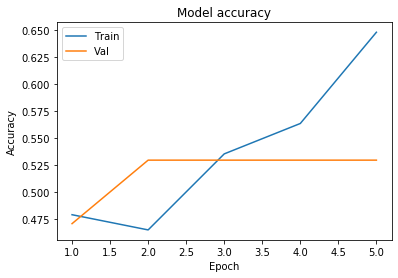

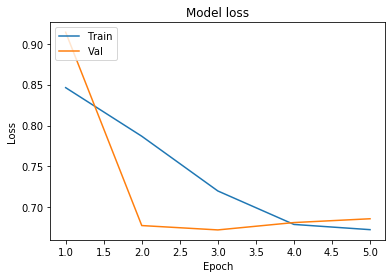

In [ ]:
 plot_learningCurve(history, 5)



img_path = '/content/c3.jpg'

img = image.load_img(img_path, target_size=(128, 128))

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)
preds = classifier.predict(x)
training_set.class_indices
if preds[0][0] == 1:
    prediction = 'cancer'
else:
    prediction = 'normal'

print(prediction)





In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np


img_path = '/content/d2.jpg'

img = image.load_img(img_path, target_size=(64, 64))

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)
preds = model.predict(x)
train_data_generator.class_indices
if preds[0][0] == 1:
    prediction = 'cat'
else:
    prediction = 'dog'
    

print(prediction)

cat
